# Multicompartment Model of Multiple Sclerosis

Developed by Corey Chitwood, based on Multicompartment Model of Vascularized Solid Tumors by Gautam Machiraju, and advised by Dr. Hermann Frieboes






### Importing Scripts and Packages

In [1]:
from new_ms_model import *
from ms_analyzer import *
from ms_data import *
from new_ms_plotter import *
from ms_stress_function import *

import numpy as np
import os
import sys
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as tqdm
import seaborn as sns # is this needed?


### Defining Global Parameters

The 'parameters' dictionary contains parameter values that can be passed to functions within the separate python scripts. The parameter values are constants throughout all scripts, and are not changed by any of the scripts.

In [2]:
'''number of compartments (5 is standard)'''
n = 5 

maxIter = 200 #update later

'''initial conditions'''
IC_N = 200 #number of neurons
IC_L = 1000 #number of OLG

'''nomral shedding rates'''
uh_ec = 4.56e2
uh_nec = 4.56e1 #factor of 10 smaller

'''protein degradation rate'''
kdeg_ec = 5 #update
kdeg_nec = 5 #update


'''cell growth rates'''
kBL_0 = 0.001
kBL_max = 0.1 #update

birth_rate_type = 1
# birth_rate_type can be exponential (1) or linear (2)

# assume 0 neuronal growth, so we don't need a parameter as this does not change


'''death rates'''
kDL_0 = 0
kDN_0 = 0 
kDL_max = 0.1
kDN_max = 0.5

death_rate_type = 3
# death_rate_type can be exponential (1), linear (2), or 'CnDeathsOnly' (3) (where oligodendrocytes will only die if they are in the
# n'th stress compartment)

'''probability of becomming stressed/time'''
prob_stress_0 = 0.05 #update/sensitivity analysis
prob_stress_max = 0.2 #update/sensitivity analysis

prob_type = 2
# prob_type can be exponential (1), or linear (2)


'''number of relapse/remission cycles'''
# each cycle represents the number of relapses, which will be followed in the model with an associated period of remission

num_cycles = 1
# num_cycles can be 1, 2, or 3

stress_length = 100
remission_length = 100

stresst0 = 0

stress_type = 1
#change stress_type to sigmoidal(1), linear(2), exponential(3), or log(4) 
#dependinging on desired model of oxidative stress


remissiont0 = stresst0 + stress_length

remission_type = 1
#change remission_type to sigmoidal(1), linear(2), exponential(3), or log(4)
#dependinging on desired model of remission

### update with lengths for each relapsing/remission period for simulation




parameters = {}
#parameters added to a dictionary so that they can be passed to each function



############ don't forget to update loop if adding any parameters #############

for variable in ['n', 'maxIter', 'IC_N', 'IC_L', 'uh_ec', 'uh_nec', 'kdeg_ec', 'kdeg_nec', 'kBL_0', 'birth_rate_type', 
    'kBL_max', 'kDL_max', 'kDN_max','death_rate_type', 'prob_stress_0', 'prob_stress_max', 'prob_type', 'num_cycles',
    'stress_length', 'remission_length', 'stresst0', 'remissiont0','stress_type','remission_type', 'kDL_0']:
    parameters[variable] = eval(variable)







### Results Dictionary

Defining a dictionary to store results that will be updated with data from each function from the scripts. This will allow for data to be passed between scripts and functions

In [3]:
results = {}

# 1. Oxidative Stress


### Stress Type


Changes in the type of equation used to model oxidative stress affect the rate of disease progression. 

Dashed lines represent separation between compartments.


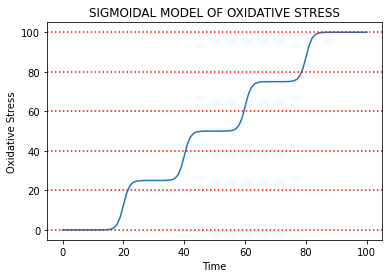

In [4]:
stresslevel0 = 0

# current inputs: t0, length, stress level, stress type, n
stress = oxidative_stress_equation(stresst0, stress_length, stresslevel0, stress_type, n)
# n previously defined as number of compartments


#current inputs: stress, n, stress_type, t0, length
plot_stress_equation(stress, n, stress_type, stresst0, stress_length)


### Remission type

Changes in the type of equation used to model remission affect the rate that oxidative stress returns to the baseline. 

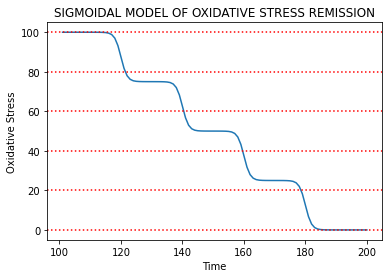

In [5]:
remissionlevel0 = max(stress)

#current inputs: t0, length, stress level, remission type, n
remission = remission_equation(remissiont0, remission_length, remissionlevel0, remission_type, n)


#current inputs: remission, n, remission type, t0, length
plot_remission_equation(remission, n, remission_type, remissiont0, remission_length)


### Overall Stress Equation Example

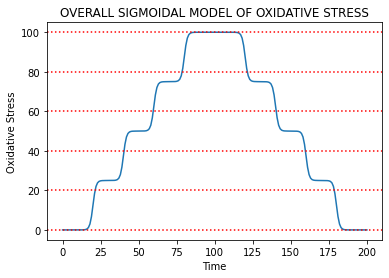

In [6]:
overall_stress = np.append(stress, remission)

# current inputs: overall_stress, stress_type, remission_type, t0, tmax
plot_overall_stress(overall_stress, stress_type, remission_type, n, stresst0, remissiont0 + remission_length)

# 2. Growth Model

In [7]:
oligodendrocyte_growth(parameters, results)

Running Oligodendrocyte Stress, Relapse #1:   0%|          | 0/100 [00:00<?, ?it/s]

Running Oligodendrocyte Stress, Remission #1:   0%|          | 0/100 [00:00<?, ?it/s]

In [8]:
neuron_growth(parameters, results)

Running Neuron Stress, Relapse #1:   0%|          | 0/100 [00:00<?, ?it/s]

Running Neuron Stress, Remission #1:   0%|          | 0/100 [00:00<?, ?it/s]

##### Growth Model Plots

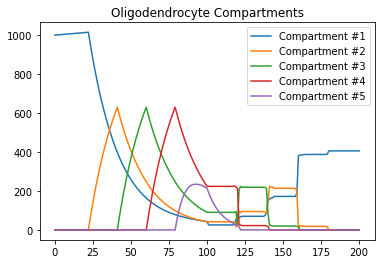

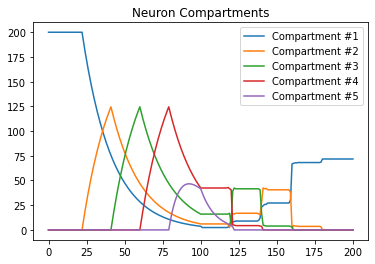

In [14]:
plot_compartments_vs_time(parameters, results)

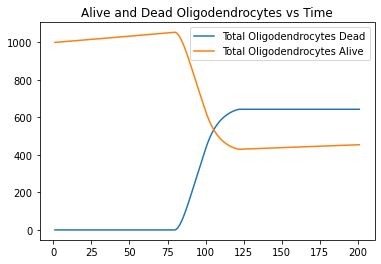

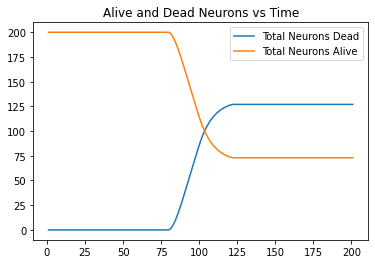

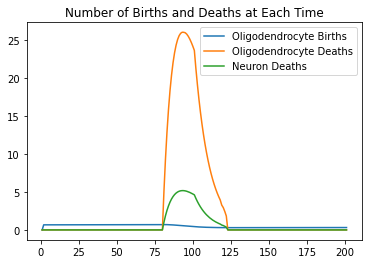

In [15]:
plot_alive_dead_vs_time(parameters, results)

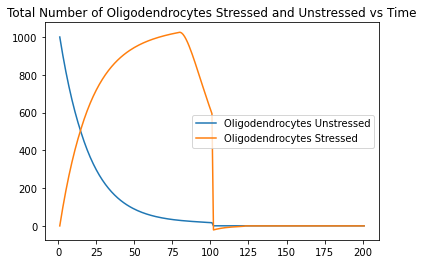

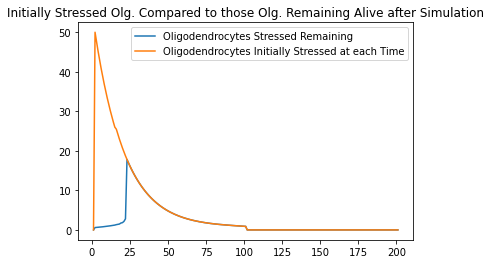

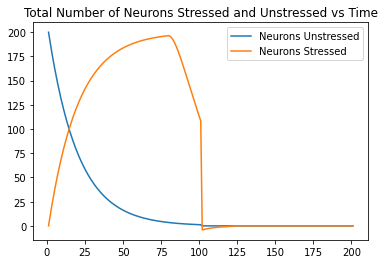

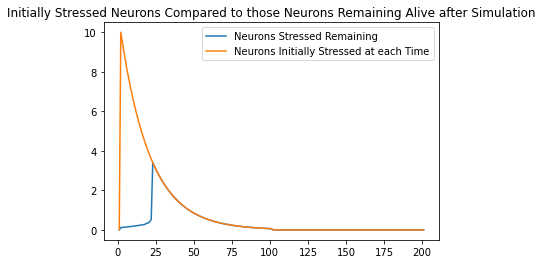

In [16]:
plot_stressed_unstressed_vs_time(parameters, results)

# 3. Shedding Model

In [13]:
protein_shedding(parameters, results)

NameError: name 'protein_shedding' is not defined

##### Shedding Model Plots

In [ ]:
plot_protein_shedding(parameters, results)